# Computation on Arrays: Broadcasting

NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
**One can also vectorize operations by using NumPy's *broadcasting* functionality.**
**Broadcasting is simply a set of rules for applying binary ufuncs** (e.g., addition, subtraction, multiplication, etc.) **on arrays of different sizes.**

**Broadcasting means streching one's shape to match with others shape / size** 

## Introducing Broadcasting

For arrays of the same size, binary operations are performed on an element-by-element basis:

In [1]:
import numpy as np


In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b


array([5, 6, 7])

**Broadcasting allows these types of binary operations to be performed on arrays of different sizes**–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [3]:
a + 5

array([5, 6, 7])

Its **our mental model to think that this operation stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.**
The **advantage of NumPy's broadcasting** is that this **duplication of values does not actually take place.**

Observe the result when we add a one-dimensional array to a two-dimensional array:

In [4]:
M = np.ones((3, 3))
M


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [5]:
a


array([0, 1, 2])

In [6]:
M + a


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array **``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``**.

Consider the following example:

**newaxis** is also called as a pseudo-index that **allows the temporary addition of an axis into a multiarray.**

In [11]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)
print(a.reshape(3, 1))

[0 1 2]
[[0]
 [1]
 [2]]
[[0]
 [1]
 [2]]


In [12]:
a + b


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!
The geometry of these examples is visualized in the following figure (Code to produce this plot can be found in the [appendix](06.00-Figure-Code.ipynb#Broadcasting), and is adapted from source published in the [astroML](http://astroml.org) documentation. Used by permission).

![Broadcasting Visual](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/02.05-broadcasting.png?raw=1)

The light boxes represent the broadcasted values: again, **this extra memory is not actually allocated in the course of the operation**, it is **just conceptual imagination**.

## **Rules of Broadcasting**

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with **shape equal to 1** in that dimension **is stretched to match the other shape.**
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

### Broadcasting example 1

Let's look at adding a ** two-dimensional array to a one-dimensional array:**

In [20]:
M = np.ones((2, 3))
a = np.arange(3)


In [21]:
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [22]:
M + a


array([[1., 2., 3.],
       [1., 2., 3.]])

### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [23]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)


[[0]
 [1]
 [2]]
[0 1 2]


Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [24]:
a + b


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Broadcasting example 3 - when the two arrays are not compatible:

In [25]:
M = np.ones((3, 2))
a = np.arange(3)

print(M)
print(a)


[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]


This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the **final shapes do not match, so these two arrays are incompatible**, as we can observe by attempting this operation:

In [26]:
M + a


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

**Broadcasting rules apply to *any* binary ``ufunc``.**
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [27]:
print(M)
print(a)
print(a[:, np.newaxis])
np.logaddexp(M, a[:, np.newaxis])


[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]
[[0]
 [1]
 [2]]


array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

For more information on the many available universal functions, refer to [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb).

## Broadcasting in Practice

### Centering an array

Broadcasting extends this ability of remving loops.One commonly seen example is when centering an array of data.
Create an array of 10 observations, each of which consists of 3 values.


In [28]:
X = np.random.random((10, 3))
X


array([[0.89623252, 0.21284756, 0.93717161],
       [0.4244423 , 0.53678161, 0.42382124],
       [0.43295703, 0.97337065, 0.57148897],
       [0.47189723, 0.01358199, 0.02140925],
       [0.94080184, 0.60821778, 0.63649402],
       [0.10265381, 0.9515939 , 0.93420226],
       [0.07621739, 0.4648208 , 0.13417187],
       [0.19432578, 0.8068525 , 0.63962995],
       [0.11603644, 0.86088259, 0.95949946],
       [0.07010567, 0.27779038, 0.18278557]])

We can compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [29]:
Xmean = X.mean(0)
Xmean


array([0.372567  , 0.57067398, 0.54406742])

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [30]:
X_centered = X - Xmean
X_centered


array([[ 0.52366552, -0.35782641,  0.39310419],
       [ 0.0518753 , -0.03389236, -0.12024618],
       [ 0.06039003,  0.40269668,  0.02742155],
       [ 0.09933023, -0.55709199, -0.52265817],
       [ 0.56823484,  0.0375438 ,  0.0924266 ],
       [-0.2699132 ,  0.38091992,  0.39013484],
       [-0.29634961, -0.10585318, -0.40989555],
       [-0.17824122,  0.23617853,  0.09556253],
       [-0.25653056,  0.29020862,  0.41543204],
       [-0.30246133, -0.2928836 , -0.36128185]])

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [31]:
X_centered.mean(0)


array([-1.11022302e-17,  6.66133815e-17,  6.66133815e-17])

To within machine precision, the mean is now zero.

### Plotting a two-dimensional function

**One place that broadcasting is very useful is in displaying images based on two-dimensional functions.**
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [32]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 5)
y = np.linspace(0, 5, 5)[:, np.newaxis]
print(x)
print(y)
print(y.shape)
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
print(z.shape)
print(z)


[0.   1.25 2.5  3.75 5.  ]
[[0.  ]
 [1.25]
 [2.5 ]
 [3.75]
 [5.  ]]
(5, 1)
(5, 5)
[[-0.83907153  0.32779018  0.6781112   0.69222873  0.41940746]
 [-0.83907153  0.76170932 -0.67346126  0.43284959  0.41441835]
 [-0.83907153  0.859756    0.69220188 -0.70614622  0.40969682]
 [-0.83907153  0.4274637  -0.68717597 -0.39007605  0.40524808]
 [-0.83907153  0.32224423  0.70553683  0.73318806  0.40107702]]


We'll use Matplotlib to plot this two-dimensional array

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline


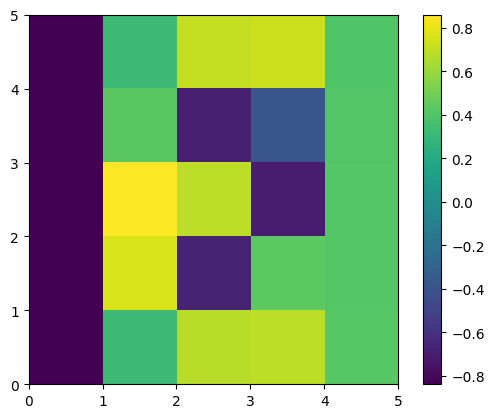

In [34]:
plt.imshow(z, origin="lower", extent=[0, 5, 0, 5], cmap="viridis")
plt.colorbar()

The result is a compelling visualization of the two-dimensional function.